### Model Predicting Fire & Non Fire Using Thermal Hot Images  

In [ ]:
!pip install -U scikit-image

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import os
import seaborn as sns
import pandas as pd
from skimage.filters import sobel
from PIL import Image,ImageEnhance,ImageOps

In [2]:
classes = {'Fire':0 ,"No_Fire":1}
print(os.listdir("C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training/"))

['Fire', 'No_Fire']


In [3]:
classes

{'Fire': 0, 'No_Fire': 1}

In [4]:
#Resize images to
SIZE = 224

In [5]:
#Capture images and labels into arrays.
#Start by creating empty lists.
train_images = []
train_labels = [] 
for directory_path in glob.glob("C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training/*"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = Image.open(img_path)
#         img = ImageOps.grayscale(img)
#         img = ImageEnhance.Contrast(img).enhance(2)
#         img = ImageEnhance.Sharpness(img).enhance(50)
#         img = ImageEnhance.Brightness(img).enhance(1)
        img = img.resize((SIZE,SIZE))
        img = np.array(img.getdata()).reshape(img.size[0], img.size[1], 3)
        train_images.append(img)
        train_labels.append(label)
        
train_images = np.array(train_images)
train_labels = np.array(train_labels)

Fire
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 1000.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 1001.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 1002.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 1003.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 1004.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 1005.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteH

C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 1447.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 1448.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 1449.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 1450.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 1451.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 1452.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Da

C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 1504.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 1505.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 1506.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 1507.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 1508.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 1509.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Da

C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 1562.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 1563.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 1564.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 1565.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 1566.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 1567.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Da

C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 1686.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 1687.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 1688.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 1689.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 1690.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 1691.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Da

C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 1743.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 1744.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 1745.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 1746.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 1747.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 1748.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Da

C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 1800.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 1801.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 1802.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 1803.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 1804.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 1805.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Da

C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 242.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 243.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 244.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 245.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 246.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 247.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)

C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 318.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 319.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 320.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 321.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 322.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 323.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)

C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 374.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 375.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 376.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 377.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 378.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 379.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)

C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 431.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 432.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 433.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 434.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 435.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 436.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)

C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 488.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 489.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 490.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 491.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 492.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 493.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)

C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 546.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 547.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 548.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 549.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 550.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 551.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)

C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 666.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 667.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 668.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 669.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 670.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 671.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)

C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 785.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 786.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 787.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 788.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 789.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 790.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)

C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 949.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 950.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 951.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 952.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 953.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\Fire\Image 954.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)

C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\No_Fire\Image 1073.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\No_Fire\Image 1074.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\No_Fire\Image 1075.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\No_Fire\Image 1076.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\No_Fire\Image 1077.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\No_Fire\Image 1078.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Da

C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\No_Fire\Image 1128.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\No_Fire\Image 1129.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\No_Fire\Image 1130.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\No_Fire\Image 1131.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\No_Fire\Image 1132.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\No_Fire\Image 1133.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Da

C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\No_Fire\Image 1181.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\No_Fire\Image 1182 - Copy.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\No_Fire\Image 1182.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\No_Fire\Image 1183 - Copy.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\No_Fire\Image 1183.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\No_Fire\Image 1184 - Copy.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detectio

C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\No_Fire\Image 213.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\No_Fire\Image 2130 - Copy.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\No_Fire\Image 2130.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\No_Fire\Image 2131 - Copy.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\No_Fire\Image 2131.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\No_Fire\Image 2132 - Copy.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection

C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\No_Fire\Image 2157 - Copy.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\No_Fire\Image 2157.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\No_Fire\Image 2158 - Copy.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\No_Fire\Image 2158.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\No_Fire\Image 2159 - Copy.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\No_Fire\Image 2159.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detectio

C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\No_Fire\Image 2205.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\No_Fire\Image 2206.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\No_Fire\Image 2207.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\No_Fire\Image 2208.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\No_Fire\Image 2209.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\No_Fire\Image 2210.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Da

C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\No_Fire\Image 830 - Copy.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\No_Fire\Image 830.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\No_Fire\Image 831 - Copy.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\No_Fire\Image 831.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\No_Fire\Image 832 - Copy.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Training\No_Fire\Image 832.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Cl

In [6]:
train_images.shape , train_labels.shape

((1306, 224, 224, 3), (1306,))

In [7]:
#train_labels

In [8]:
#Do exactly the same for test/validation images
# test
test_images = []
test_labels = [] 
for directory_path in glob.glob("C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Testing/*"):
    t_label = directory_path.split("\\")[-1]
    print(t_label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = Image.open(img_path)
#         img = ImageOps.grayscale(img)
#         img = ImageEnhance.Contrast(img).enhance(2)
#         img = ImageEnhance.Sharpness(img).enhance(50)
#         img = ImageEnhance.Brightness(img).enhance(1)
        img = img.resize((SIZE,SIZE))
        img = np.array(img.getdata()).reshape(img.size[0], img.size[1], 3)
        test_images.append(img)
        test_labels.append(t_label)
        
test_images = np.array(test_images)
test_labels = np.array(test_labels)

Fire
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Testing\Fire\Image 1477.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Testing\Fire\Image 1478.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Testing\Fire\Image 1479.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Testing\Fire\Image 1480.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Testing\Fire\Image 1481.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Testing\Fire\Image 1482.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dat

C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Testing\Fire\Image 665.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Testing\Fire\Image 666.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Testing\Fire\Image 667.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Testing\Fire\Image 668.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Testing\Fire\Image 669.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Testing\Fire\Image 670.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Testi

C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Testing\No_Fire\Image 1119.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Testing\No_Fire\Image 1120.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Testing\No_Fire\Image 1121.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Testing\No_Fire\Image 1122.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Testing\No_Fire\Image 1123.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Testing\No_Fire\Image 1124.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets

C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Testing\No_Fire\Image 2134.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Testing\No_Fire\Image 2135 - Copy.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Testing\No_Fire\Image 2135.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Testing\No_Fire\Image 2136 - Copy.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Testing\No_Fire\Image 2136.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/WhiteHot(Dataset)/Testing\No_Fire\Image 823.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classifica

In [9]:
test_images.shape,test_labels.shape

((214, 224, 224, 3), (214,))

In [10]:
#Encode labels from text (folder names) to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)

le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [11]:
test_labels, test_labels_encoded

(array(['Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire',
        'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire',
        'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire',
        'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire',
        'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire',
        'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire',
        'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire',
        'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire',
        'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire',
        'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire',
        'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire',
        'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire',
        'Fire', 'Fire', 'Fire', 'Fire', 'No_Fire', 'No_Fire', 'No_Fire',
        'No_Fire', 'No_Fire', 'No_Fire', 'No_Fire', 'No_Fire', 

In [12]:
train_labels, train_labels_encoded

(array(['Fire', 'Fire', 'Fire', ..., 'No_Fire', 'No_Fire', 'No_Fire'],
       dtype='<U7'),
 array([0, 0, 0, ..., 1, 1, 1]))

In [13]:
#Split data into test and train datasets (already split but assigning to meaningful convention)
#If you only have one dataset then split here
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

----------------------------------------------

### Feature Extraction Using Filters

In [14]:
###################################################################
# FEATURE EXTRACTOR function
# input shape is (n, x, y, c) - number of images, x, y, and channels
def feature_extractor(dataset):
    x_train = dataset
    image_dataset = pd.DataFrame()
    for image in range(x_train.shape[0]):  #iterate through each file 
        #print(image)
        
        df = pd.DataFrame()  #Temporary data frame to capture information for each loop.
        #Reset dataframe to blank after each loop.
        
        input_img = x_train[image, :,:,:]
        img = input_img
        
    ################################################################
    #START ADDING DATA TO THE DATAFRAME
    #Add feature extractors, e.g. edge detection, smoothing, etc. 
            
         # FEATURE 1 - Pixel values
         
        #Add pixel values to the data frame
        
        pixel_values = img.reshape(-1)
        df['Pixel_Value'] = pixel_values   #Pixel value itself as a feature
        
        #df['Image_Name'] = image   #Capture image name as we read multiple images
        
        # FEATURE 2 - Bunch of Gabor filter responses
        
                #Generate Gabor features
        num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
        kernels = []
        for theta in range(2):   #Define number of thetas
            theta = theta / 4. * np.pi
            for sigma in (1, 3):  #Sigma with 1 and 3
                lamda = np.pi/4
                gamma = 0.5
                gabor_label = 'Gabor' + str(num)  #Label Gabor columns as Gabor1, Gabor2, etc.
    #                print(gabor_label)
                ksize=9
                kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
                kernels.append(kernel)
                #Now filter the image and add values to a new column 
                fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)
                filtered_img = fimg.reshape(-1)
                df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
                print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
                num += 1  #Increment for gabor column label
                
         
        # FEATURE 3 Sobel
        edge_sobel = sobel(img)
        edge_sobel1 = edge_sobel.reshape(-1)
        df['Sobel'] = edge_sobel1
       
        #Add more filters as needed
        
        #Append features from current image to the dataset
        image_dataset = image_dataset.append(df)
        
    return image_dataset

In [15]:
#Extract features from training images
image_features = feature_extractor(x_train)

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

In [16]:
print(1306*224*224*3)

x_train.shape

196589568


(1306, 224, 224, 3)

In [17]:
image_features.shape

(196589568, 6)

In [18]:
#Reshape to a vector for Random Forest / SVM training
n_features = image_features.shape[1]

image_features = np.expand_dims(image_features, axis=0)

X_for_RF = np.reshape(image_features, (x_train.shape[0], -1))  #Reshape to #images, features

In [19]:
n_features

6

In [20]:
image_features.shape

(1, 196589568, 6)

In [21]:
X_for_RF.shape

(1306, 903168)

In [14]:
x_updated_train = x_train.reshape(len(x_train), -1)
x_updated_train.shape

(1306, 150528)

In [15]:
x_updated_test = x_test.reshape(len(x_test), -1)
x_updated_test.shape

(214, 150528)

In [16]:
#Define the classifier
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators =50, random_state = 42)

In [17]:
# Fit the model on training data
RF_model.fit(x_updated_train, y_train) #For sklearn no one hot encoding

RandomForestClassifier(n_estimators=50, random_state=42)

In [30]:
#Can also use SVM but RF is faster and may be more accurate.
from sklearn import svm
SVM_model = svm.SVC(decision_function_shape='ovo')  #For multiclass 'ovr' classification
SVM_model.fit(x_updated_train, y_train)

SVC(decision_function_shape='ovo')

### Testing Model

In [24]:
#Predict on Test data
#Extract features from test data and reshape, just like training data
test_features = feature_extractor(x_test)
test_features = np.expand_dims(test_features, axis=0)
test_for_RF = np.reshape(test_features, (x_test.shape[0], -1))

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

In [31]:
#Predict on test using RF
test_prediction = SVM_model.predict(x_updated_test)

In [ ]:
#Predict on test using SVM
test_pred = SVM_model.predict(x_updated_test)

In [32]:
#Inverse le transform to get original label back for RF
test_prediction = le.inverse_transform(test_prediction)

In [ ]:
#Inverse le transform to get original label back for SVM
test_pred = le.inverse_transform(test_pred)

In [33]:
#Print overall accuracy of RF
from sklearn import metrics
print ("Accuracy = ", SVM_model.score(x_updated_train, y_train))
print ("Accuracy = ", metrics.accuracy_score(test_labels, test_prediction))

Accuracy =  1.0
Accuracy =  1.0


Training Accuracy: 1.0
Testing Accuracy: 1.0
              precision    recall  f1-score   support

        Fire       1.00      1.00      1.00       100
     No_Fire       1.00      1.00      1.00       114

    accuracy                           1.00       214
   macro avg       1.00      1.00      1.00       214
weighted avg       1.00      1.00      1.00       214



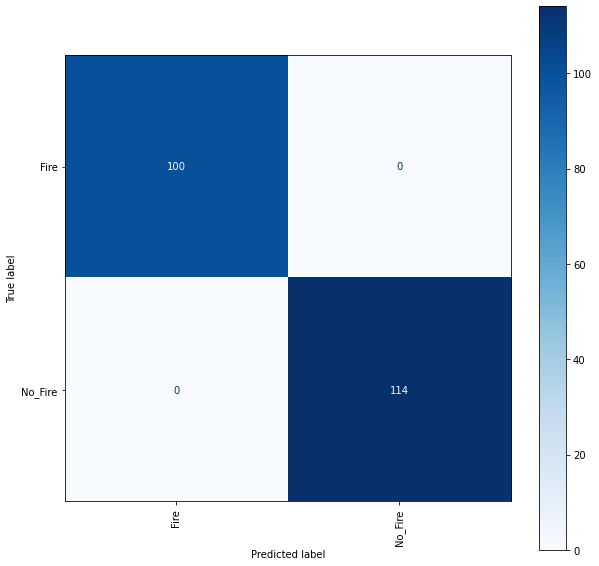

In [34]:
# RF Model
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

labels = ["Fire", "No_Fire"]

cm = confusion_matrix(test_labels, test_prediction)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

fig, ax = plt.subplots(figsize=(10,10))

disp.plot(cmap=plt.cm.Blues,ax=ax, xticks_rotation='vertical')

print('Training Accuracy: ' +str(SVM_model.score(x_updated_train, y_train)))

print('Testing Accuracy: ' +str(accuracy_score(test_labels, test_prediction)))

print(classification_report(test_labels, test_prediction))

In [35]:
mythreshold=0.88 #Random Threshold
from sklearn.metrics import confusion_matrix

y_pred = (SVM_model.predict(x_updated_test)>= mythreshold).astype(int)
cm=confusion_matrix(y_test, y_pred)  
print(cm)

[[100   0]
 [  0 114]]


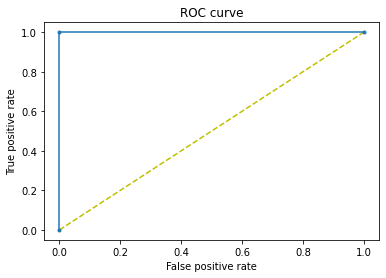

In [36]:
#ROC
from sklearn.metrics import roc_curve
y_preds = SVM_model.predict(x_updated_test).ravel()

fpr, tpr, thresholds = roc_curve(y_test, y_preds)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [37]:
import pandas as pd
i = np.arange(len(tpr)) 
roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'thresholds' : pd.Series(thresholds, index=i)})
ideal_roc_thresh = roc.iloc[(roc.tf-0).abs().argsort()[:1]]  #Locate the point where the value is close to 0
print("Ideal threshold is: ", ideal_roc_thresh['thresholds']) 

Ideal threshold is:  1    1
Name: thresholds, dtype: int32


[[100   0]
 [  0 114]]


<AxesSubplot:>

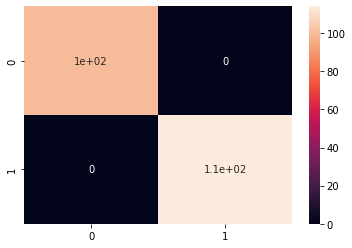

In [38]:
mythreshold=1 # Ideal thresholds
from sklearn.metrics import confusion_matrix

y_pred = (SVM_model.predict(x_updated_test)>= mythreshold).astype(int)
cm=confusion_matrix(y_test, y_pred)  
print(cm)
sns.heatmap(cm, annot=True)

In [39]:
from sklearn.metrics import auc
auc_value = auc(fpr, tpr)

print("Area under curve, AUC = ", auc_value)

Area under curve, AUC =  1.0


In [40]:
# RF Model
import scikitplot as skplt
import matplotlib.pyplot as plt

y_probas = SVM_model.predict_proba(x_updated_test)
skplt.metrics.plot_roc_curve(y_test, y_probas)
plt.show()

AttributeError: predict_proba is not available when  probability=False

In [ ]:
#Print overall accuracy of SVM
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, test_pred))

[[100   0]
 [  0 114]]


<AxesSubplot:>

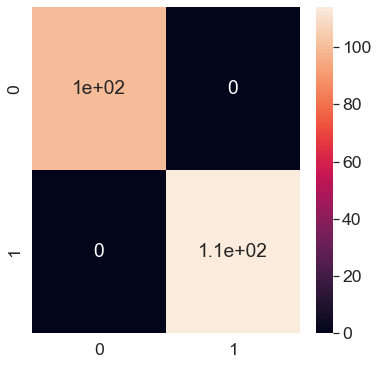

In [55]:
#Print confusion matrix of RF# RF Model
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

labels = ["Fire", "No_Fire"]

cm = confusion_matrix(test_labels, test_prediction)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

fig, ax = plt.subplots(figsize=(10,10))

disp.plot(cmap=plt.cm.Blues,ax=ax, xticks_rotation='vertical')

print('Training Accuracy: ' +str(RF_model.score(X_for_RF, y_train)))

print('Testing Accuracy: ' +str(accuracy_score(test_labels, test_prediction)))

print(classification_report(test_labels, test_prediction))

mythreshold=0.88 #Random Threshold
from sklearn.metrics import confusion_matrix

y_pred = (RF_model.predict(test_for_RF)>= mythreshold).astype(int)
cm=confusion_matrix(y_test, y_pred)  
print(cm)

#ROC
from sklearn.metrics import roc_curve
y_preds = RF_model.predict(test_for_RF).ravel()

fpr, tpr, thresholds = roc_curve(y_test, y_preds)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

import pandas as pd
i = np.arange(len(tpr)) 
roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'thresholds' : pd.Series(thresholds, index=i)})
ideal_roc_thresh = roc.iloc[(roc.tf-0).abs().argsort()[:1]]  #Locate the point where the value is close to 0
print("Ideal threshold is: ", ideal_roc_thresh['thresholds']) 

mythreshold=1 # Ideal thresholds
from sklearn.metrics import confusion_matrix

y_pred = (RF_model.predict(test_for_RF)>= mythreshold).astype(int)
cm=confusion_matrix(y_test, y_pred)  
print(cm)
sns.heatmap(cm, annot=True)

from sklearn.metrics import auc
auc_value = auc(fpr, tpr)

print("Area under curve, AUC = ", auc_value)

# RF Model
import scikitplot as skplt
import matplotlib.pyplot as plt

y_probas = RF_model.predict_proba(test_for_RF)
skplt.metrics.plot_roc_curve(y_test, y_probas)
plt.show()
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, test_prediction)
print(cm)
fig, ax = plt.subplots(figsize=(6,6))         # Sample figsize in inches
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, ax=ax)

In [ ]:
#Print confusion matrix of SVM
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, test_pred)
print(cm)
fig, ax = plt.subplots(figsize=(6,6))         # Sample figsize in inches
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, ax=ax)

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
The prediction for this image is:  ['No_Fire']
The actual label for this image is:  No_Fire


C:\Users\Lenovo\anaconda3\envs\myDL\lib\site-packages\sklearn\preprocessing\_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


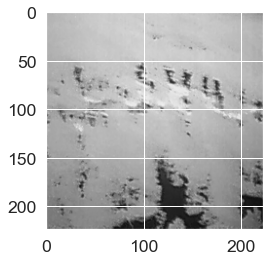

In [33]:
#Check results on a few random images for RF
import random
n=random.randint(0, x_test.shape[0]-1) #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)

#Extract features and reshape to right dimensions
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_features=feature_extractor(input_img)
input_img_features = np.expand_dims(input_img_features, axis=0)
input_img_for_RF = np.reshape(input_img_features, (input_img.shape[0], -1))
#Predict
img_prediction = RF_model.predict(input_img_for_RF)
img_prediction = le.inverse_transform([img_prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", img_prediction)
print("The actual label for this image is: ", test_labels[n])

In [ ]:
#Check results on a few random images of SVM
import random
n=random.randint(0, x_test.shape[0]-1) #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)

#Extract features and reshape to right dimensions
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_features=feature_extractor(input_img)
input_img_features = np.expand_dims(input_img_features, axis=0)
input_img_for_SVM = np.reshape(input_img_features, (input_img.shape[0], -1))
#Predict
img_prediction = SVM_model.predict(input_img_for_SVM)
img_prediction = le.inverse_transform([img_prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", img_prediction)
print("The actual label for this image is: ", test_labels[n])

{'Fire': 0, 'No_Fire': 1}
Original Image Shape (224, 224, 3)
Expanded Image Shape (1, 224, 224, 3)
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Featured Image Shape (150528, 6)
Expanded featured Image Shape (1, 150528, 6)
Reshaping featured Image into single vector  (1, 903168)
The prediction for this image is:  ['No_Fire']
The actual label for this image is  fire


C:\Users\Lenovo\anaconda3\envs\myDL\lib\site-packages\sklearn\preprocessing\_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


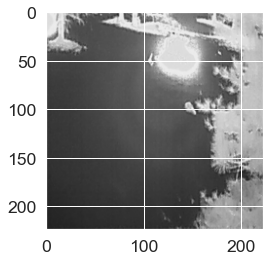

In [47]:
from PIL import Image , ImageOps , ImageEnhance
print(classes)
img = Image.open("./Datasets/Image 355.jpg")

# img = ImageOps.grayscale(img)
# img = ImageEnhance.Contrast(img).enhance(2)
# img = ImageEnhance.Sharpness(img).enhance(50)
# img = ImageEnhance.Brightness(img).enhance(1)

img = img.resize((SIZE,SIZE))

plt.imshow(img)

img = np.array(img.getdata()).reshape(img.size[0], img.size[1], 3)

print("Original Image Shape",img.shape)

#Extract features and reshape to right dimensions

input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)

print("Expanded Image Shape",input_img.shape)

input_img_features=feature_extractor(input_img)

print("Featured Image Shape",input_img_features.shape)

input_img_features = np.expand_dims(input_img_features, axis=0)

print("Expanded featured Image Shape",input_img_features.shape)

input_img_for_RF=np.reshape(input_img_features, (input_img.shape[0], -1))

print("Reshaping featured Image into single vector ",input_img_for_RF.shape)

#Predict
img_prediction = RF_model.predict(input_img_for_RF)
img_prediction = le.inverse_transform([img_prediction])  #Reverse the label encoder to original name

print("The prediction for this image is: ", img_prediction)
print("The actual label for this image is  fire")